# Graue Theorie

(Hahnebüchern vereinfacht. Ich hoffe es sind keine Biologen oder gar Neurologen anwesend ...)

<img src="https://upload.wikimedia.org/wikipedia/commons/3/3e/Neurons_big1.jpg" style="width:800px;"/>

### Das Neuron

Neuronen sind Nervenzellen.

- **Dendriten:** Eingänge des Neurons. Nehmen die Ausgaben von anderen Nervenzellen entgegen.
- **Körper:** Summiert die Signale an den Eingängen und wendet auf diese Summe einen Schwellwert an: Wenn die Summe den Schwellwert überschreitet, entsteht ein Signal am Ausgang. 
- **Axon:** Ausgang des Neurons. Leitet den "Wert" des Neurons (oft als Aktiviereungsniveau oder einfach "Aktivierung" bezeichnet) an andere Nervenzellen weiter.

### Die Synapsen

Synapsen verbinden Axone mit Dendriten und damit Neuronen untereinander. 
- Die Verbindung kann unterschiedlich stark ausgeprägt sein und die Signale entsprechend besser oder weniger gut weiterleiten. 
- Die Synapsen *gewichten* somit die an die nachfolgenden Neuronen weitergegebenen Signale.

> **"Wissen" ist also vor allem durch die Stärke der Synapsen repräsentiert. Und "Lernen" bedeutet nichts anderes als die Anpassung der Stärke dieser Synapsen!**

## Künstliches Neuronales Netzwerk

### Struktur

Im künstlichen Neuronales Netzwerk interessiert uns nicht, dass ein Neuron aus Körper, Dendriten und Axonen besteht. Was uns am Neuron interessiert, ist jedoch die Summenbildung und die Schwellwertfunktion. Und uns interessieren die Synapsen mit ihren "Gewichten".   

Die Knoten (Kreise) im Bild repräsentieren Neuronen. Die Kanten (Linien) repräsentieren die Synapsen. 

<img src="https://blog.iao.fraunhofer.de/images/blog/ki-katze.jpg" style="width:600px;"/>

Ein natürliches Neuronales Netz (vulgo: Gehirn) ist ziemlich chaotisch organisiert. Ein wildes Knäuel aus Neuronen. Ein künstliches Neuronales Netz ist dagegen in Schichten (Layer) aufgebaut. Zumindest die Art, mit der wir uns hier beschäftigen: Den *mehrschichtigen Feedforward-Netzen* 

- Eine Eingabeschicht (Input Layer), welche Signale von aussen entgegennimmt 
- eine Ausgabeschicht (Output Layer), von der wir das Ergebnis abgreifen und 
- ein oder mehrere "versteckte" Zwischenschichten (Hidden Layer)

Übrigens betreiben die Neuronen der Eingabeschicht weder Summenbildung noch besitzen sie eine Schwellwertfunktion. Sie leiten das Eingabesignal 1:1 an die Synapsen (Kanten) weiter.

### Wissen Abfragen

Angenommen, wir haben ein bereits trainiertes Netz.

1. Wir legen Werte an die Neuronen der Eingabeschicht an. Zum Beispiel die Pixelwerte eines Bildes.
1. Wir berechnen Schicht für Schicht die Werte ("Aktivierungen") der Neuronen. 
1. Wir interpretieren die Werte der Neuronen der Ausgabeschicht. Wenn zum Beispiel das erste Neuron einen hohen Ausgabewert ("eine starke Aktivierung") hat und das zweite eine schwache, interpretieren wir das als "ist eine Katze". 

### Wissen Lernen

1. Wir legen Werte an die Neuronen der Eingabeschicht an (z.B. die Pixelwerte eines Bildes)
2. Wir führen eine Abfrage aus und vergleichen die Werte der Ausgabeschicht mit den von uns erwarteten Werten.
3. Die sich ergebenden Abweichungen führen wir rückwärts (vom Ausgang zum Eingang) durch die Schichten. Für jedes Neuron ergibt sich somit ein individueller Fehlerwert. Der Vorgang heisst *Backpropagation*. 
4. Nun passen wir die Gewichte der Synapsen so an, dass für jedes Neuron der Fehlerwert ein wenig kleiner wird. Nach dieser Anpassung ist unser Netz ein bisschen besser geworden - es hat gelernt.
5. Das Ganze machen wir viele tausend Mal mit unterschiedlichen Eingaben.


## Mathematische Modellierung

Ein künstliches Neronales Netz ist primär eigentlich kein "Programm", sondern in erster Linie ein rein mathematisches Konstrukt. 

### Synapsen: Darstellung als Matrix

Statt als Pfeile zwischen Knoten können die Synapsen auch als Matrix dargestellt werden. Die Werte in der Matrix stehen dabei für die Stärke der Verbindung (oft als *Gewicht* oder *Weight* bezeichnet) 

<!-- <img src="http://www.neuronalesnetz.de/nnbilder/neuronennetze/matrix.gif" style="width:600px;"/> -->

<img src="NeuroNetzEigenbau-NetzZuMatrix.drawio.svg" style="width:700px;"/>


### Neuronen: Summenbildung und Aktivierungsfunktion

In künstlichen Neuronalen Netzen bezeichnent man die erwähne Schwellwertbildung als *Aktivierungsfunktion*.  

Im Neuron werden 
- die gewichteten Eingangssignale summiert und 
- die Summe durch die Aktivierungsfunktion geleitet. 

<!-- <img src="https://datasolut.com/wp-content/uploads/2019/11/neuronale_netze_aktivierung-1024x485.png" style="width:600px;"/> -->

<img src="NeuroNetzEigenbau-EinKnoten.drawio.svg" style="width:700px;"/>


### Matrixmultiplikation: Gewichtung und Summenbildung in einem Aufwasch

Praktischerweise liefert uns die Mathematik ein Werkzeug, mit dem man Gewichtung und Summenbildung *für alle* Neuronen einer Schicht super einfach erledigen kann: Die Matrixmultiplikation! 

Die Ausgabewerte der vorangehenden Neuronen-Schicht stellen einen *Vektor* dar. Jedes Element des Vektors entspricht dem Ausgabewert eines Neurons. Der Vektor hat also so viele Elemente, wie die Schicht Neuronen. Die Synapsen-Gewichte können wir wie gezeigt in einer Matrix anordnen. Die Multiplikation der Gewichte-Matrix mit dem Ausgabewerte-Vektor ergibt einen neuen Vektor: Die Eingaben für die aktuelle Neuronen-Schicht:    

<!-- <img src="IMG_0455.jpeg" style="width:500px;"/> <img src="IMG_0457.jpeg" style="width:500px;"/> -->

<img src="NeuroNetzEigenbau-MatrixMult.drawio.svg" style="width:700px;"/>


### Aktivierungsfunktion

Nach der Summenbildung muss der Eingabewert eines jeden Neurons noch durch die Aktivierungsfunktion geschleust werden.

Die Aktivierungsfunktion ist *keine* Sprungfunktion mit binärem Ausgang, sondern eine stetige Funktion mit einem starkem Anstieg (Gradienten) um den Nullpunkt herum und einem flachen Verlauf an den Enden ([Sigmoidfunktion](https://de.wikipedia.org/wiki/Sigmoidfunktion)). Hier in der konkreten Implementierung  die sog. [Logistische Funktion](https://de.wikipedia.org/wiki/Logistische_Funktion) (manchmal auch als "Expit Function" bezeichnet):  

![](https://datatab.de/assets/tutorial/Logistische-Funktion.png)

### Übertragungsfunktion

Die Aktivierung ("der Ausgabewert") y eines Neurons ergibt sich also aus den Aktivierungen x der vorangegangenen Schicht wie folgt:

<font size="4">
$$
y_{i} = f _{act} \left( \sum \limits _{j=0} ^{n} w_{ij} x_{j} \right)
$$
</font>

### Wissen Abfragen

- Eine Abfrage des Netzes bedeutet nichts anderes, als Schicht für Schicht die Aktivierungen aller Neuronen zu berechnen.
- Bei typischen Klassifizierungsaufgaben repräsentiert das Neuron der Ausgabeschicht mit der höchsten Aktivierung sozusagen "die Antwort". (ist Katze, ist Hund, ...)

### Lernen 

- Zunächst wird mit der zu lernenden Eingabe eine Abfrage durchgeführt.
- Dann wird der Fehlervektor für die Ausgabeschicht als Differenz zwischen den gewünschten Werten und den tatsächlichen Aktivierungen ermittelt.  
- Dann werden die Fehler genau wie vorhin die Eingabewerte Schicht für Schicht durch das Netz geschleust. Nur diesmal von hinten nach vorne. Aus diesem Grund musss die Matrixmultiplikation mit den transponierten ("um 90 Grad gedrehten") Matrizen erfolgen. Die Fehler werden also gemäß der Gewichte in den Matritzen auf die Neuronen verteilt.
- Zuletzt werden mit Hilfe des _Gradientenabstiegsverfahrens_ für jedes Neuron (ausser der Eingangsschicht) Gewichte berechnet, die zu einem etwas geringeren Ausgabefehler für dieses Neuron führen.   
- Da hierzu die Ableitung der Übertragungsfunktion gebraucht wird, kann die Aktivierungsfunktion keine Sprungfunktion sein (da eine solche nicht ableitbar ist). 

... left as an exercise for the reader ...



# Und nun ... Code!

Der Code für das Netz stammt (in leicht abgewandelter Form) aus dem Buch 
"Neuronale Netze selbst programmieren" (Tariq Rashid, 2017, O'Reilly, ISBN Print: 978-3-96009-043-4)  

## Utilities

Haben nichts mit dem eigentlichen neuronalen Netz zu tun und dienen hauptsächlich der visualisierung der Eingaben und Ergebnisse. Zählen also nicht zu den versprochenen 30 Zeilen :-)

In [7]:
# Utilities

import os
from IPython.core.interactiveshell import InteractiveShell
from IPython.display import clear_output
import numpy as np
import scipy.special 
from matplotlib import pyplot as plt
import time
import platform
import gzip


InteractiveShell.ast_node_interactivity = "all"

print(f"Running python {platform.python_version()} on {platform.processor()}")

# Zeigt eine Zeile CSV als Bild an
def disp_img(line):
    plt.subplot(2,1,1)
    plt.imshow(make_input(line).reshape((28,28)), cmap='gray', interpolation='none');
    plt.show()

# Zeigt zufällig ein paar Zeilen aus dem CSV als Bilder an
def disp_some(data):
    i=1
    for line in np.random.choice(data, size=12):
        plt.subplot(3,4,i)
        plt.imshow(make_input(line).reshape((28,28)), cmap='gray', interpolation='none');
        i += 1
    plt.show()

# Visualisiert das Ergebnis einer Query    
def disp_result_vs_target(_input, _target, _result):
    foo = plt.subplot(2,1,1)
    plt.imshow(_input.reshape((28,28)), cmap='gray', interpolation='none');
    plt.subplot(2,1,2)
    plt.bar(range(len(_target)), height=_target.flat)
    plt.scatter(range(len(_result)), _result.flat)
    plt.grid()
    plt.show()

# Convenience Funktion um einen Vektor zu erzeugen 
def vector(a_list):
    return np.array(a_list, ndmin=2, dtype="float64").T

# Lädt ein MNIST CSV File
def load_data(path):
    file = gzip.open(path, 'rt') 
    data = file.readlines();
    file.close()
    return data   

# Einfache Progress-Anzeige
def progress(total, stop = 100):
    i = 1
    
    total * 0.0001 * stop
    while True:
        pct = i / total * 100
#        if i % int(total / 1000) == 0:
        if i % int(total * 0.0001 * stop) == 0:
            clear_output(wait=True)
            print(f"{i} / {total} ({round(pct,4)}%)")
        if pct >= stop: 
            clear_output(wait=True)
            print(f"{i} / {total} ({round(pct,4)}%)")
            yield True 
        else:
            i += 1
            yield 

Running python 3.11.6 on arm


## Das neuronale Netz

In 30 Zeilen - wie versprochen!

In [3]:
# Neuronales Netz

# Initialisieren: Anz. Knoten Input Layer, Anz. Knoten Hidden Layer, Anz. Knoten Output Layer, Learnig Rate 
def init(in_count, mid_count, out_count, rate):
    global IN_MID, MID_OUT, learmingrate, actfunc, n_outputs
    n_outputs = out_count

    IN_MID = np.random.rand(mid_count, in_count) - 0.5
    MID_OUT = np.random.rand(out_count, mid_count) - 0.5
    
    learmingrate = rate
    actfunc = lambda x: scipy.special.expit(x)

# Netz abfragen: Eingabevektor    
def query(_in):
    global IN_MID, MID_OUT, actfunc

    _mid = actfunc(IN_MID  @ _in)                
    _out = actfunc(MID_OUT @ _mid)

    return _out        

# Lernen: Eingabevektor, Zielvektor    
def train(_in, _target):
    global IN_MID, MID_OUT, rate, actfunc

    _mid = actfunc(IN_MID  @ _in)                
    _out = actfunc(MID_OUT @ _mid)

    _error_out = _out - _target
    _error_mid = MID_OUT.T @ _error_out
    
    DELTA_MID_OUT = _error_out * _out * (1.0 - _out) @ _mid.T
    DELTA_IN_MID  = _error_mid * _mid * (1.0 - _mid) @ _in.T
    
    MID_OUT -= learmingrate * DELTA_MID_OUT
    IN_MID  -= learmingrate * DELTA_IN_MID


## Ein- und Ausgabe
Diese Funktionen dienen der Vorbereitung der Eingaben für das Netz und der Interpretation der Ergebnisse

In [4]:
# Ein- und Ausgabe

# Eingabevektor aus einer MNIST CSV Zeile erzeugen
def make_input(line):
    raw = line.split(',')
    return vector(raw[1:785]) / 255 * 0.98 + 0.01

# Das Ergebnis als Zahl interpretieren
def interpret_result(_result):
    return np.argmax(_result)

# Zielvektor aus einer MNIST CSV Zeile erzeugen 
def make_target(line):
    raw = line.split(',')
    target_value = int(raw[0])
    target_list = np.zeros(n_outputs) + 0.01
    target_list[target_value] = 0.99
    return vector(target_list)

## Die Trainings- und Testdaten

60000 training images
10000 test images


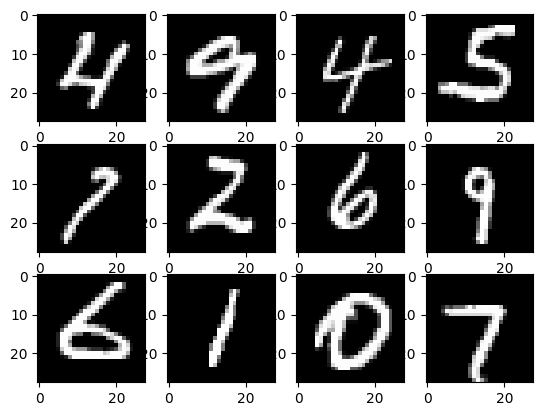

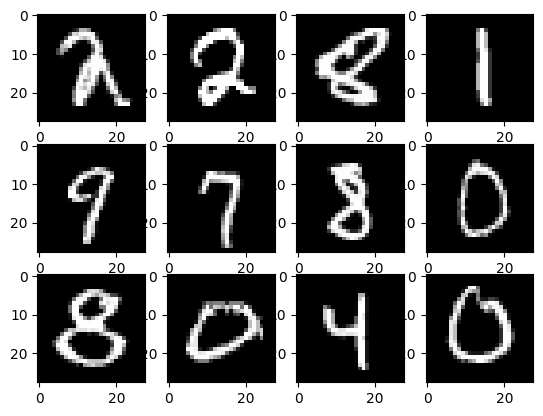

In [8]:
# Trainings- und Testdaten

# Das "normale" MNIST Dataset mit Ziffern (https://pjreddie.com/projects/mnist-in-csv/)
# Die MNIST Daten haben 28*28=784 Pixel; 

os.chdir("NeuronaleNetzeVortrag")

train_data = load_data("mnist_dataset/mnist_train.csv.gz")
test_data = load_data("mnist_dataset/mnist_test.csv.gz")

print(f"{len(train_data)} training images")
print(f"{len(test_data)} test images")

disp_some(train_data)
disp_some(test_data)

## Netz initialisieren

In [5]:
# Initialisierung 

# In Layer: Anzahl Pixel, Hidden Layer: 100 (willkürlich/experimentell), Out Layer: 10 mögliche Ziffern
# Learning Rate: 0.3 (willkürlich/experimentell)

## Hidden Layer auf 30 reduziert, damit es schneller geht 
init(784,30,10,0.3)

## Stichproben abfragen

target: 6, result: 6


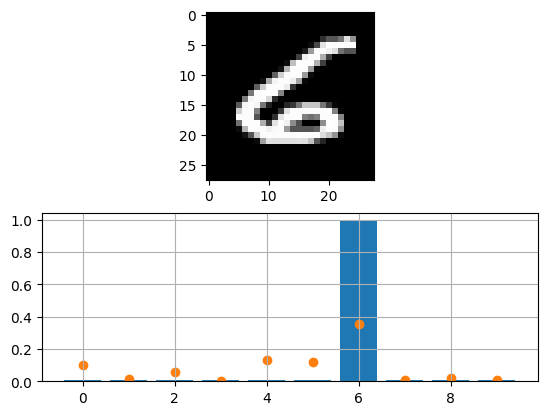

In [11]:
# Stichproben 

# Jeder Aufruf lässt einen Datensatz durchs Netz laufen und stellt das Ergebnis dar
# Der blaue Balken markiert das Soll-Ergebnis
# Die orangen Punkte zeigen die Aktivierungs-Level am Ausgabevektor

line = np.random.choice(test_data)

_input  = make_input(line)
_result = query(_input)
result_val = interpret_result(_result)
target_val = int(line.split(',')[0]) 

print(f"target: {target_val}, result: {result_val}")

disp_result_vs_target(_input, make_target(line), _result)

## Lernen

In [9]:
# Lernen

# Füttert das Netz mit Trainingsdaten.
# Die Angabe percent erlaubt den Abbruch nach n Prozent der Trainingsdatensätze

percent = 1
prog = progress(len(train_data), percent) 
for line in train_data:
    
    _input  = make_input(line)
    _target = make_target(line)
    train(_input, _target)

    if next(prog): break
print("READY") 

600 / 60000 (1.0%)
READY


## Erfolgskontrolle: Test mit allen (Test-)Daten

In [163]:
# Erfolgskontrolle

# Lässt alle Testdaten vom Netz erkennen und ermittelt die Trefferrate

percent = 10
prog = progress(len(test_data), percent) 

total = failures = 0
for line in test_data: 
    
    _input  = make_input(line)
    _result = query(_input)
    result_val = interpret_result(_result)
    
    target_val = int(line.split(',')[0]) 
 
    total += 1
    if result_val != target_val:
        failures += 1

    if next(prog): break

print(f"success rate: {round((1 - failures / total)*100,4)}% ({failures} failures out of {total})")

10000 / 10000 (100.0%)
success rate: 90.91% (909 failures out of 10000)


## Something completely different

27455 training images
7172 test images


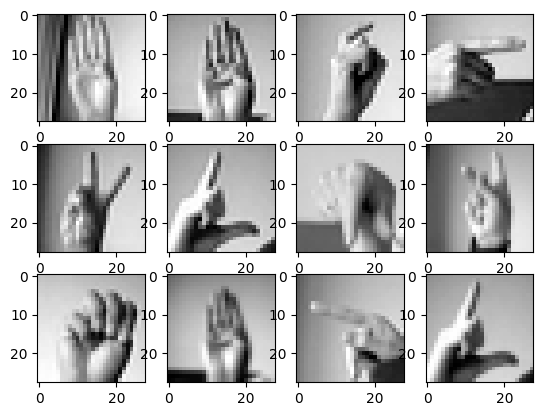

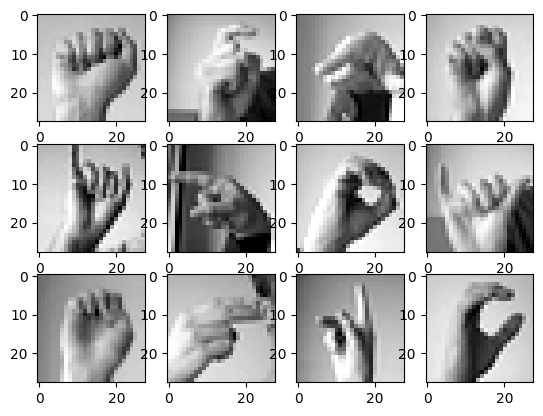

In [131]:
# MNIST kompatibler Satz mit Kleidungsstücken
#train_data = load_data("mnist_dataset/fashion-mnist_train.csv.gz")
#test_data = load_data("mnist_dataset/fashion-mnist_test.csv.gz")

# MNIST kompatibler Satz mit den 26 Buchstaben in Zeichensprache
train_data = load_data("mnist_dataset/sign_mnist_train.csv.gz")
test_data = load_data("mnist_dataset/sign_mnist_test.csv.gz")

print(f"{len(train_data)} training images")
print(f"{len(test_data)} test images")

disp_some(test_data)
disp_some(train_data)

init(784,500,26,0.05)